#Exploration Data dan Data Processing


In [29]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')

#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])

# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']

# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Call the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg = reg.fit(X_train,y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


##Regression Performance Evaluation

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.0778989610312069
Root Mean Squared Error of testing set: 0.1044654232549747


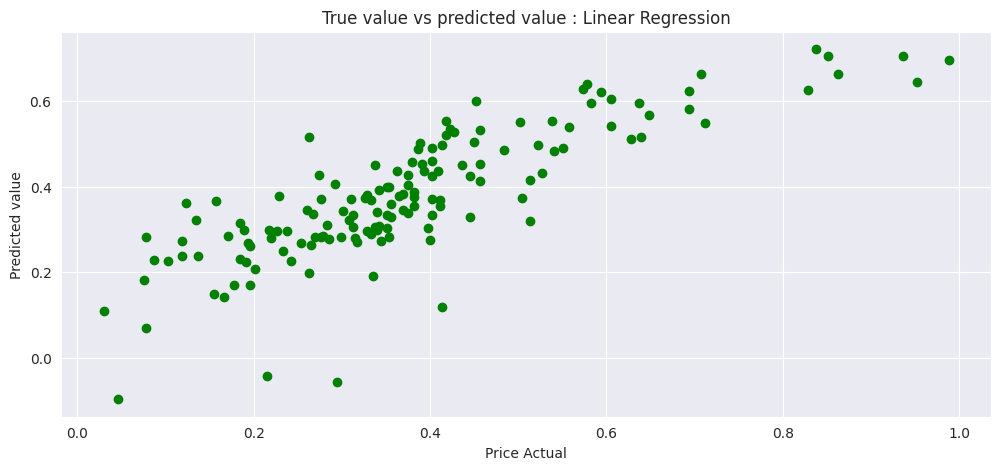

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)

#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()